## indeed.com - Amazon

In [1]:
from bs4 import BeautifulSoup
import urllib.request as req

In [2]:
pages = range(0, 400, 20)

In [3]:
reviews = []

for page in pages:
    url = "https://www.indeed.com/cmp/Amazon.com/reviews?start=" +str(page)
    html = req.urlopen(url)
    doc = BeautifulSoup(html, "html.parser")
    
    end1 = len(doc.find_all(itemprop="reviewBody"))
    r1 = [doc.find_all(itemprop="reviewBody")[n].text for n in range(0, end1)]
    reviews.extend(r1)

In [4]:
cons = []

for page in pages:
    url = "https://www.indeed.com/cmp/Amazon.com/reviews?start=" +str(page)
    html = req.urlopen(url)
    doc = BeautifulSoup(html, "html.parser")
    
    end2 = len(doc.find_all(class_="cmp-ReviewProsCons-consText"))
    r2 = [doc.find_all(class_="cmp-ReviewProsCons-consText")[n].text for n in range(0, end2)]
    cons.extend(r2)

In [5]:
title = []

for page in pages:
    url = "https://www.indeed.com/cmp/Amazon.com/reviews?start=" +str(page)
    html = req.urlopen(url)
    doc = BeautifulSoup(html, "html.parser")
    
    end3 = len(doc.find_all(class_="cmp-Review-title"))
    r3 = [doc.find_all(class_="cmp-Review-title")[n].text for n in range(0, end3)]
    title.extend(r3)

In [8]:
for w in range(21,400,20):
    del(reviews[w])
    del(title[w])

In [12]:
for i in range(0,18):
    cons.remove('short breaks, management, not the cleanest')

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
from nltk.tokenize import word_tokenize
import pandas as pd
from sklearn.cluster import KMeans

#### Stopwords:

In [14]:
from nltk.corpus import stopwords
nltk_sw = set(stopwords.words("english"))

In [150]:
my_sw = set(["advancementtuition","arlington", "could", "would", "really", "management","make", 'work','full', "get", "ato", "thing", "worl", "lot", "none", "enough", "day", "therefore", "one", "go", "everything", "else", "except", "work", "job", "amazon", "company", "actually", "aka", "also", "already",  "advancment", "allot", "alot", "amangers", "bachlors", "brake", "ca", "accomodation","accrues", "actua", "atmospherethere", "behind", "besides", "beyond", "buena", "company", "concerned", "de", "depends", "deptford", "didnt", "dsl", "e", "eben", "empresa", "enviroment", "erc","etc", "even", "felt", "flown", "gotten", "homecompetitive", "hq", "ive", "kinda", "likely", "lisle", "literally", "lo", "loa", "locationstream", "lv", "managemeng", "managementbank", "mange", "met", "mucho", "nearly", "nj", "nocenpeople", "onto" ])
         
         

In [151]:
all_stopwords = nltk_sw.union(my_sw)

In [17]:
all_stopwords

{'a',
 'about',
 'above',
 'accomodation',
 'accrues',
 'actua',
 'actually',
 'advancementtuition',
 'advancment',
 'after',
 'again',
 'against',
 'ain',
 'aka',
 'all',
 'allot',
 'alot',
 'already',
 'also',
 'am',
 'amangers',
 'amazon',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'arlington',
 'as',
 'at',
 'atmospherethere',
 'ato',
 'bachlors',
 'be',
 'because',
 'been',
 'before',
 'behind',
 'being',
 'below',
 'besides',
 'between',
 'beyond',
 'both',
 'brake',
 'buena',
 'but',
 'by',
 'ca',
 'can',
 'company',
 'concerned',
 'could',
 'couldn',
 "couldn't",
 'd',
 'day',
 'de',
 'depends',
 'deptford',
 'did',
 'didn',
 "didn't",
 'didnt',
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'dsl',
 'during',
 'e',
 'each',
 'eben',
 'else',
 'empresa',
 'enough',
 'enviroment',
 'erc',
 'etc',
 'even',
 'everything',
 'except',
 'felt',
 'few',
 'flown',
 'for',
 'from',
 'full',
 'further',
 'get',
 'go',
 'gotten',
 'had',
 'hadn',
 "had

#### get_pos function:

In [18]:
from nltk import pos_tag
from nltk.corpus import wordnet

In [19]:
def get_pos(w):
    tag = pos_tag([w])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
               "N": wordnet.NOUN,
               "V": wordnet.VERB,
               "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

### Tfidf Bag of words - Reviews

In [20]:
def my_tokenizer(r):
    r1 = word_tokenize(r)
    r2 = [w.lower() for w in r1 if w.isalpha()]
    r3 = [w for w in r2 if not w in all_stopwords]
    r4 = [w for w in r3 if not w.isdigit()]
    r5 = [lem.lemmatize(w, get_pos(w)) for w in r4]
    r6 = [w for w in r5 if not w in all_stopwords]
    return r6

In [21]:
tfidf1 = TfidfVectorizer(tokenizer = my_tokenizer)

In [22]:
tfidf_doc1 = tfidf1.fit_transform(reviews)

In [23]:
tfidf_terms = tfidf1.get_feature_names()

In [24]:
pd.set_option("display.max_columns",None)
table = pd.DataFrame(tfidf_doc1.toarray(), columns=tfidf_terms)

In [199]:
table.insert(0, "Review", title, True)
table


Review   aa  abandonment  \
0                                            It's okay  0.0          0.0   
1                                  Extremely fast pace  0.0          0.0   
2                                           Management  0.0          0.0   
3    Picker Position is great for introverts and gi...  0.0          0.0   
4                     Had great coworkers and managers  0.0          0.0   
..                                                 ...  ...          ...   
396                                   Ok place to work  0.0          0.0   
397                          horrible work environment  0.0          0.0   
398            The street mentality (culture)is there.  0.0          0.0   
399                                        Productive   0.0          0.0   
400                                   Boring workplace  0.0          0.0   

     ability      able  abre  absence  absolute  absolutely   ac  accept  \
0        0.0  0.000000   0.0      0.0  0.000000         0.0  0.0     0.0   
1        0.0  0.000000   0.0      0.0  0.000000         0.0  0.0     0.0   
2        0.0  0.000000   0.0      0.0  0.000000         0.0  0.0     0.0   
3        0.0  0.114444   0.0      0.0  0.000000         0.0  0.0     0.0   
4        0.0  0.000000   0.0      0.0  0.000000         0.0  0.0     0.0   
..       ...       ...   ...      ...       ...         ...  ...     ...   
396      0.0  0.000000   0.0      0.0  0.000000         0.0  0.0     0.0   
397      0.0  0.000000   0.0      0.0  0.270738         0.0  0.0     0.0   
398      0.0  0.000000   0.0      0.0  0.000000         0.0  0.0     0.0   
399      0.0  0.000000   0.0      0.0  0.000000         0.0  0.0     0.0   
400      0.0  0.000000   0.0      0.0  0.000000         0.0  0.0     0.0   

     access  accessible  accident  accolade  accommodate  accommodation  \
0       0.0         0.0       0.0       0.0          0.0            0.0   
1       0.0         0.0       0.0       0.0          0.0            0.0   
2       0.0         0.0       0.0       0.0          0.0            0.0   
3       0.0         0.0       0.0       0.0          0.0            0.0   
4       0.0         0.0       0.0       0.0          0.0            0.0   
..      ...         ...       ...       ...          ...            ...   
396     0.0         0.0       0.0       0.0          0.0            0.0   
397     0.0         0.0       0.0       0.0          0.0            0.0   
398     0.0         0.0       0.0       0.0          0.0            0.0   
399     0.0         0.0       0.0       0.0          0.0            0.0   
400     0.0         0.0       0.0       0.0          0.0            0.0   

     account  accrue  accumulate  achieve  across  acrue  act  action  active  \
0        0.0     0.0         0.0      0.0     0.0    0.0  0.0     0.0     0.0   
1        0.0     0.0         0.0      0.0     0.0    0.0  0.0     0.0     0.0   
2        0.0     0.0         0.0      0.0     0.0    0.0  0.0     0.0     0.0   
3        0.0     0.0         0.0      0.0     0.0    0.0  0.0     0.0     0.0   
4        0.0     0.0         0.0      0.0     0.0    0.0  0.0     0.0     0.0   
..       ...     ...         ...      ...     ...    ...  ...     ...     ...   
396      0.0     0.0         0.0      0.0     0.0    0.0  0.0     0.0     0.0   
397      0.0     0.0         0.0      0.0     0.0    0.0  0.0     0.0     0.0   
398      0.0     0.0         0.0      0.0     0.0    0.0  0.0     0.0     0.0   
399      0.0     0.0         0.0      0.0     0.0    0.0  0.0     0.0     0.0   
400      0.0     0.0         0.0      0.0     0.0    0.0  0.0     0.0     0.0   

     activity  actual  add  additional  additionally  adherence  \
0         0.0     0.0  0.0         0.0           0.0        0.0   
1         0.0     0.0  0.0         0.0           0.0        0.0   
2         0.0     0.0  0.0         0.0           0.0        0.0   
3         0.0     0.0  0.0         0.0           0.0        0.0   
4         0.0

### Cons

In [25]:
tfidf2 = TfidfVectorizer(tokenizer = my_tokenizer)

In [26]:
tfidf_doc2 = tfidf2.fit_transform(cons)

In [27]:
tfidf_terms2 = tfidf2.get_feature_names()

In [28]:
pd.set_option("display.max_columns",None)
table2 = pd.DataFrame(tfidf_doc2.toarray(), columns=tfidf_terms2)
table2

,abuse,ac,accountability,accrue,actual,advance,advancement,ahold,allow,alone,always,among,amount,angry,another,anything,apply,appreciate,appreciation,area,associate,atmosphere,attendance,attitude,available,bad,badge,balance,barely,bathroom,benefit,best,bias,blue,body,boring,boss,bottom,break,breathing,candy,capitalism,care,certain,chance,change,check,choke,claim,cleanest,clique,clock,come,comfort,communicate,communication,compassion,complex,con,condition,consideration,constantly,contact,counting,covid,coworkers,crazy,csa,culture,customer,deal,demand,department,depend,descansó,desperation,detach,differentiation,difficult,direction,disababled,doctor,doesnt,dont,drain,drama,drive,drop,easy,eat,either,elementary,employee,emt,entire,environment,equality,every,everyday,exhaust,exhaustion,expect,expectation,extra,extremely,far,fast,favorite,favoritism,feel,find,fire,first,flex,flexibility,floor,foot,forever,friendly,future,good,growth,hamburg,happen,happens,hard,hay,health,healthcare,hectic,help,high,hire,hit,horrible,hostile,hot,hour,hr,huge,human,idea,important,impossible,inadequate,inconsistent,ineffective,inexperienced,injure,injury,inside,intelligence,intense,isolate,isolated,issue,joke,know,la,labor,lack,last,lead,leader,least,legally,less,level,life,lift,like,limited,linch,little,load,long,longer,loud,low,lunch,machine,manager,manages,managment,mandate,mandatory,mangement,many,may,maybe,meet,member,mental,mentally,method,micromanaged,micromanagement,millennials,min,minute,mistake,misuse,modern,money,monotonous,motion,move,movement,much,myopic,neck,need,new,noise,nothing,number,office,often,ok,operation,opportunity,originally,ot,others,overtime,overwhelm,overwork,pa,pace,pad,paga,pain,para,pay,peak,people,per,performance,performer,physical,physically,picker,place,poca,point,politics,pollution,poor,poorly,position,privacy,professionalism,progression,promote,promotion,proper,provide,pto,purpose,push,put,qualify,quota,raise,rate,read,real,reason,recognition,reddit,regardless,regularly,repetition,repetitive,replaceable,requirement,review,reward,ridiculous,risk,robotic,room,rude,salary,say,scan,schedule,school,season,seasonal,see,seemingly,select,serve,shift,short,show,site,skill,slavery,slow,sometime,sometimes,somewhat,spontaneous,stability,stand,start,station,stay,stink,stop,strenuous,stress,stressful,strict,stuff,suck,superior,supervisor,supply,support,sure,sweat,system,take,talk,task,tax,team,tedious,termination,terrible,thankless,think,thst,time,tire,ton,top,tough,toxic,trabajo,train,training,trainning,treat,trust,try,turn,typically,ultimatum,underpay,understaffed,unexplained,unfulfilling,unnecessary,unorganized,ups,use,useless,value,ventilation,walk,warehouse,warm,watch,water,way,weather,weekend,well,within,worker,workload,worn,worth,write,writes,year,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.785809,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.618469,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

# Clustering

## Reviews

In [29]:
from sklearn.cluster import KMeans

In [30]:
distance1 = []

K = range(1,10)
for x in K:
    km_n = KMeans(n_clusters=x, random_state=0)
    km_fit = km_n.fit(tfidf_doc1)
    num = km_fit.inertia_
    distance1.append(num)

In [31]:
import matplotlib.pyplot as plt

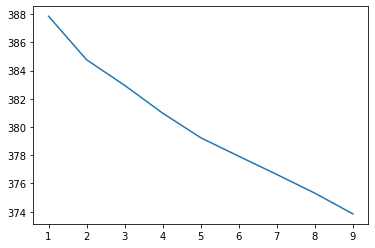

In [32]:
plt.plot(K, distance1)
plt.show()

In [33]:
km1 = KMeans(n_clusters=3, random_state=0)

In [34]:
km1.fit(tfidf_doc1)

KMeans(n_clusters=3, random_state=0)

In [35]:
oc1 = km1.cluster_centers_.argsort()[:, ::-1]

for i in range(0,3):
    top_words = [tfidf_terms[x] for x in oc1[i, :5]]
    print(top_words)

['time', 'hour', 'break', 'long', 'care']
['people', 'manager', 'give', 'like', 'come']
['good', 'pay', 'great', 'place', 'hour']


### Cons

In [36]:
distance2 = []

K = range(1,10)
for x in K:
    km_n = KMeans(n_clusters=x, random_state=0)
    km_fit = km_n.fit(tfidf_doc2)
    num = km_fit.inertia_
    distance2.append(num)

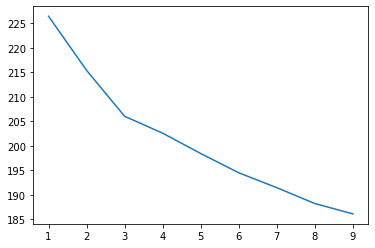

In [37]:
plt.plot(K, distance2)
plt.show()

In [113]:
km2 = KMeans(n_clusters=3, random_state=2)

In [114]:
km2.fit(tfidf_doc2)

C:\Users\js713\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:57: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\js713\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:57: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\js713\anaconda3\lib\site-packages\sklearn\metrics\pairw

KMeans(n_clusters=3, random_state=2)

In [117]:
oc2 = km2.cluster_centers_.argsort()[:, ::-1]

for i in range(0,3):
    top_words = [tfidf_terms2[x] for x in oc2[i, :6]]
    print(top_words)

['bad', 'break', 'lack', 'balance', 'boring', 'life']
['pay', 'bad', 'low', 'workload', 'much', 'short']
['break', 'short', 'hour', 'long', 'cleanest', 'boring']


## Sentiment Analysis

In [41]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [42]:
vader = SentimentIntensityAnalyzer()

In [43]:
end = len(reviews)

In [44]:
sentiment = [vader.polarity_scores(reviews[n])["compound"] for n in range(0, end)]

In [45]:
sentiment

[0.8957,
 0.6191,
 0.4404,
 0.9201,
 0.7184,
 0.6428,
 0.9136,
 0.101,
 -0.078,
 0.9741,
 0.0772,
 0.9448,
 0.256,
 -0.2838,
 0.3818,
 0.7411,
 0.7481,
 -0.4218,
 -0.0772,
 -0.0676,
 -0.4684,
 -0.1779,
 -0.765,
 -0.5994,
 0.7876,
 0.9091,
 0.0,
 0.8885,
 0.4767,
 -0.5937,
 0.3612,
 -0.0437,
 0.6925,
 0.9608,
 0.0082,
 -0.128,
 0.9705,
 0.7093,
 -0.4754,
 0.7334,
 0.0516,
 -0.4036,
 0.5994,
 0.5563,
 -0.5615,
 0.8313,
 0.6361,
 0.0772,
 -0.6915,
 0.3415,
 -0.0516,
 0.4818,
 0.9766,
 -0.2299,
 0.9022,
 0.9505,
 0.3612,
 0.7146,
 0.5574,
 0.7814,
 0.1531,
 0.9686,
 0.9524,
 0.9943,
 0.8874,
 0.128,
 0.8977,
 0.81,
 0.5707,
 0.8653,
 0.6486,
 0.8312,
 0.7307,
 0.0,
 0.9848,
 0.7476,
 -0.0529,
 -0.3931,
 0.975,
 0.0772,
 0.4215,
 0.8315,
 0.7087,
 0.775,
 0.09,
 0.8932,
 0.7719,
 -0.1065,
 -0.702,
 0.3182,
 0.3757,
 0.4768,
 0.34,
 0.5423,
 0.1486,
 0.948,
 0.8718,
 0.8016,
 -0.1531,
 0.4417,
 0.8552,
 0.7003,
 0.5423,
 -0.7789,
 -0.4144,
 0.7992,
 0.9139,
 0.0258,
 0.8934,
 0.9559,
 0.9623

In [46]:
import numpy as np

In [47]:
employee_review = pd.DataFrame({"Title": title,
             "Sentiment": sentiment})

In [48]:
employee_review.describe()

,Sentiment
count,401.000000
mean,0.342596
std,0.582210
min,-0.981800
25%,-0.067600
50%,0.542300
75%,0.839600
max,0.994300


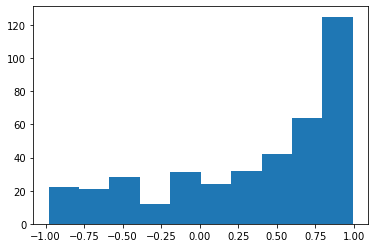

In [49]:
plt.hist(sentiment)
plt.show()

we can see that employees are overall satisfied with the company 

then the reason why the rating is low is that few employees are very dissatisfied with the company and decreased the average ratings

And their complaints are found on the clusters of cons

In [50]:
counterFunc = employee_review.apply(
    lambda x: True if x[1] > 0.2 else False , axis=1)
numOfRows = len(counterFunc[counterFunc == True].index)
print('Number of positive reviews:',numOfRows)

Number of positive reviews: 264


In [51]:
counterFunc = employee_review.apply(
    lambda x: True if x[1] < -0.2 else False , axis=1)
numOfRows = len(counterFunc[counterFunc == True].index)
print('Number of negative reviews:',numOfRows)

Number of negative reviews: 83


## 1. LSA

### 1.1. SVD

#### reviews

In [52]:
from sklearn.decomposition import TruncatedSVD

In [53]:
svd = TruncatedSVD(n_components=2, random_state=0)

In [54]:
svd.fit(tfidf_doc1)

TruncatedSVD(random_state=0)

In [55]:
svd.components_

array([[ 0.00259066,  0.00291776,  0.00944177, ...,  0.00277829,
         0.00528182,  0.00575552],
       [-0.00459972, -0.00516982,  0.00944302, ..., -0.00096902,
        -0.01196757,  0.00762117]])

In [56]:
svd.components_.argsort()[:, ::-1]

array([[ 659, 1641,  745, ..., 1599, 1705, 1108],
       [ 659,  667,  150, ...,  212,  918, 1641]], dtype=int64)

In [57]:
svd_topics1 = svd.components_.argsort()[:, ::-1]

In [58]:
for i in range(0, 2):
    top_words = [tfidf_terms[x] for x in svd_topics1[i, :5]]
    print(top_words)

['good', 'time', 'hour', 'pay', 'great']
['good', 'great', 'benefit', 'pay', 'place']


#### cons

In [152]:
svd2 = TruncatedSVD(n_components=4, random_state=0)

In [153]:
svd2.fit(tfidf_doc2)

C:\Users\js713\anaconda3\lib\site-packages\scipy\linalg\decomp_qr.py:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  kwargs['lwork'] = ret[-2][0].real.astype(numpy.int)
C:\Users\js713\anaconda3\lib\site-packages\scipy\linalg\decomp_qr.py:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current

TruncatedSVD(n_components=4, random_state=0)

In [154]:
svd2.components_

array([[ 1.82818986e-07,  1.36240044e-03,  8.00736671e-04, ...,
         3.03315069e-04,  1.24969414e-04,  3.29777051e-08],
       [-8.28352973e-07,  2.74144959e-04, -1.83792435e-04, ...,
        -2.61261282e-05,  4.32434264e-04, -5.19195860e-07],
       [-3.47655585e-06,  8.42462579e-04,  8.14647733e-04, ...,
         3.02126468e-04,  3.35842134e-04, -2.26386051e-06],
       [ 8.93496318e-06, -2.06168197e-04,  1.50241177e-03, ...,
         6.03116052e-04,  1.79087378e-04,  1.01262217e-05]])

In [155]:
svd_topics2 = svd2.components_.argsort()[:, ::-1]

In [156]:
for i in range(0, 4):
    top_words = [tfidf_terms[x] for x in svd_topics2[i, :3]]
    print(top_words)

['advertise', 'conclusion', 'basically']
['basically', 'bottle', 'concern']
['chaos', 'activity', 'box']
['bone', 'add', 'christmas']


### 1.2. NMF

In [64]:
from sklearn.decomposition import NMF

In [65]:
nmf = NMF(n_components=2, random_state=0)

#### reviews

In [66]:
nmf.fit(tfidf_doc1)

NMF(n_components=2, random_state=0)

In [67]:
nmf.components_

array([[0.00835864, 0.00929823, 0.00295132, ..., 0.00583462, 0.01891227,
        0.00017431],
       [0.        , 0.        , 0.0208509 , ..., 0.00157068, 0.        ,
        0.01429925]])

In [68]:
nmf_topics1 = nmf.components_.argsort()[:, ::-1]

In [69]:
for i in range(0, 2):
    top_words = [tfidf_terms[x] for x in nmf_topics1[i, :5]]
    print(top_words)

['time', 'manager', 'people', 'break', 'hard']
['good', 'great', 'pay', 'benefit', 'hour']


#### cons

In [178]:
nmf2 = NMF(n_components=3, random_state=0)

In [179]:
nmf2.fit(tfidf_doc2)

C:\Users\js713\anaconda3\lib\site-packages\scipy\linalg\decomp_qr.py:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  kwargs['lwork'] = ret[-2][0].real.astype(numpy.int)
C:\Users\js713\anaconda3\lib\site-packages\scipy\linalg\decomp_qr.py:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current

NMF(n_components=3, random_state=0)

In [180]:
nmf_topics2 = nmf2.components_.argsort()[:, ::-1]

In [183]:
for i in range(0, 3):
    top_words = [tfidf_terms[x] for x in nmf_topics2[i, :2]]
    print(top_words)

['advertise', 'conclusion']
['basically', 'bottle']
['chaos', 'activity']


## 2. LDA

#### reviews

In [74]:
import gensim

C:\Users\js713\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [75]:
from gensim import corpora

In [76]:
doc1 = []

words1 = [my_tokenizer(r) for r in reviews]
doc1.extend(words1)
doc1

[['typical',
  'scan',
  'package',
  'build',
  'pallet',
  'pretty',
  'simple',
  'athletic',
  'base',
  'well',
  'hard',
  'meet',
  'scan',
  'rate',
  'requirement',
  'good',
  'eh',
  'kind',
  'learn',
  'avoid',
  'meet',
  'great',
  'coworkers',
  'though',
  'enjoy',
  'everyday',
  'alright',
  'love',
  'hate',
  'pay',
  'bill'],
 ['recommend',
  'anyone',
  'like',
  'constantly',
  'walk',
  'break',
  'stressful',
  'foot',
  'pay',
  'good',
  'well',
  'leave',
  'alone',
  'long'],
 ['never',
  'knew',
  'supervisor',
  'think',
  'good',
  'supervisor',
  'effort',
  'know',
  'worker',
  'especially',
  'high',
  'pick',
  'rate'],
 ['great',
  'able',
  'specialist',
  'sense',
  'take',
  'time',
  'start',
  'give',
  'vacation',
  'time',
  'pto',
  'unpaid',
  'time',
  'use',
  'z',
  'app',
  'put',
  'time',
  'atmosphere',
  'great',
  'good',
  'position',
  'hard',
  'time',
  'customer',
  'service',
  'tough',
  'take',
  'toll',
  'body',
  'phys

In [77]:
gensim_terms1 = corpora.Dictionary(doc1)

In [78]:
doc_matrix1 = [gensim_terms1.doc2bow(d) for d in doc1]

In [79]:
doc_matrix1

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 2),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 2),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1)],
 [(10, 1),
  (20, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1)],
 [(10, 1),
  (22, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 2),
  (48, 1),
  (49, 1)],
 [(10, 1),
  (11, 2),
  (12, 2),
  (17, 2),
  (42, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 2),
  (57, 2),
  (58, 1),
  (59, 3),
  (60, 2),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 2),
  (68, 1),
  (69, 1),
  (70, 2),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81,

In [80]:
lda = gensim.models.ldamodel.LdaModel

In [99]:
lda_model1 = lda(doc_matrix1, num_topics=2, id2word=gensim_terms1, random_state=0)

In [100]:
lda_model1.print_topics(num_words=3)

[(0, '0.017*"good" + 0.014*"time" + 0.012*"pay"'),
 (1, '0.016*"time" + 0.013*"pay" + 0.013*"hour"')]

In [101]:
for n in range(0, 6):
    print(lda_model1[doc_matrix1[n]])

[(0, 0.9722927), (1, 0.027707266)]
[(0, 0.26000798), (1, 0.739992)]
[(0, 0.36518237), (1, 0.6348176)]
[(0, 0.4843206), (1, 0.5156794)]
[(0, 0.07349372), (1, 0.9265063)]
[(0, 0.050442684), (1, 0.9495573)]


In [102]:
!pip install pyLDAvis

In [103]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

In [104]:
pyLDAvis.gensim_models.prepare(topic_model=lda_model1, corpus=doc_matrix1, dictionary=gensim_terms1)

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.016136  0.0       1        1  50.642713
0     -0.016136  0.0       2        1  49.357287, topic_info=         Term       Freq      Total Category  logprob  loglift
35       like  62.000000  62.000000  Default  30.0000  30.0000
136    number  26.000000  26.000000  Default  29.0000  29.0000
133      care  38.000000  38.000000  Default  28.0000  28.0000
21     pretty  23.000000  23.000000  Default  27.0000  27.0000
58       give  32.000000  32.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
132       bad  20.913569  45.284957   Topic2  -5.3264  -0.0665
28       well  19.811868  50.934398   Topic2  -5.3805  -0.2382
176  schedule  16.247370  31.342311   Topic2  -5.5789   0.0490
35       like  17.347401  62.227826   Topic2  -5.5134  -0.5713
36       long  16.604172  48.403037   Topic2  -5.5572  -0.3638

[177 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
50        1  0.712222     able
50        2  0.305238     able
607       1  0.733593  advance
607       2  0.244531  advance
142       1  0.344853   around
...     ...       ...      ...
92        2  0.281859    write
321       1  0.624396     year
321       2  0.374637     year
606       1  0.698684      yes
606       2  0.174671      yes

[244 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

#### cons

In [184]:
doc2 = []

words2 = [my_tokenizer(c) for c in cons]
doc2.extend(words2)
doc2

[['appreciate', 'hard'],
 ['mandatory',
  'extra',
  'time',
  'physically',
  'exhaust',
  'typically',
  'happens',
  'quota',
  'change',
  'trainning'],
 ['hot', 'inside', 'warehouse'],
 ['hard', 'labor', 'available', 'hr'],
 ['treat', 'like', 'machine'],
 ['life', 'balance'],
 ['hard', 'physically', 'sometime', 'mentally', 'care'],
 ['much'],
 ['fast', 'pace'],
 ['short',
  'break',
  'foot',
  'constantly',
  'micromanaged',
  'repetitive',
  'isolated',
  'boring'],
 ['good'],
 ['huge', 'warehouse', 'break', 'walk', 'long'],
 ['short', 'break', 'long', 'hour', 'ridiculous', 'quota'],
 ['short',
  'break',
  'favoritism',
  'lead',
  'promotion',
  'easy',
  'advance',
  'communication'],
 ['time', 'task', 'low', 'pay', 'place'],
 ['opportunity', 'advancement'],
 ['short', 'break', 'poor'],
 [],
 ['easy', 'worn'],
 ['future'],
 ['hay', 'descansó', 'min'],
 ['bad', 'coworkers'],
 ['favoritism'],
 ['con'],
 ['little', 'break'],
 [],
 ['short', 'break'],
 ['supply', 'water'],
 ['pay

In [185]:
gensim_terms2 = corpora.Dictionary(doc2)

In [186]:
doc_matrix2 = [gensim_terms2.doc2bow(d) for d in doc2]

In [196]:
lda_model2 = lda(doc_matrix2, num_topics=3, id2word=gensim_terms2, random_state=0)

In [197]:
lda_model2.print_topics(num_words=3)

[(0, '0.030*"break" + 0.021*"bad" + 0.018*"time"'),
 (1, '0.050*"hour" + 0.039*"long" + 0.021*"boring"'),
 (2, '0.068*"break" + 0.068*"short" + 0.019*"hour"')]

In [198]:
pyLDAvis.gensim_models.prepare(topic_model=lda_model2, corpus=doc_matrix2, dictionary=gensim_terms2)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.075249 -0.024170       1        1  47.380069
0      0.060348 -0.047945       2        1  29.743306
1      0.014901  0.072116       3        1  22.876624, topic_info=          Term       Freq      Total Category  logprob  loglift
41        hour  20.000000  20.000000  Default  30.0000  30.0000
39        long  16.000000  16.000000  Default  29.0000  29.0000
36       short  33.000000  33.000000  Default  28.0000  28.0000
29      boring   7.000000   7.000000  Default  27.0000  27.0000
51       place   3.000000   3.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
7   physically   1.169868   7.863661   Topic3  -5.1180  -0.4303
49         low   0.924756   3.287409   Topic3  -5.3531   0.2067
22        life   0.992866   5.763282   Topic3  -5.2820  -0.2836
61         bad   1.020685  11.251343   Topic3  -5.2544  -0.9250
21     balance   0.898768   6.408858   Topic3  -5.3816  -0.4894

[189 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
275       2  0.737324       accrue
53        1  0.576164  advancement
53        2  0.144041  advancement
53        3  0.288082  advancement
246       2  0.982478        allow
...     ...       ...          ...
371       3  0.788255      weather
254       1  0.910542         well
257       2  0.736919       within
264       3  0.537700     workload
96        1  0.675927        write

[189 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

In [190]:
from gensim.models import CoherenceModel

In [191]:
nums = range(1, 6)

In [192]:
scores1 = []

for n in nums:
    lda_model_search = lda(doc_matrix1, num_topics=n, id2word=gensim_terms1, random_state=0)
    score1 = CoherenceModel(model=lda_model_search, texts=doc1, dictionary=gensim_terms1, coherence="c_v").get_coherence()
    scores1.append(score1)

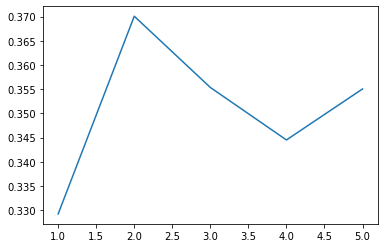

In [193]:
import matplotlib.pyplot as plt
plt.plot(nums, scores1)
plt.show()

In [194]:
scores2 = []

for n in nums:
    lda_model_search = lda(doc_matrix2, num_topics=n, id2word=gensim_terms2, random_state=0)
    score2 = CoherenceModel(model=lda_model_search, texts=doc2, dictionary=gensim_terms2, coherence="c_v").get_coherence()
    scores2.append(score2)

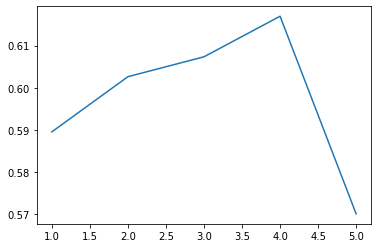

In [195]:
plt.plot(nums, scores2)
plt.show()